In [1]:
from bert_serving.client import BertClient
bc = BertClient()

KeyboardInterrupt: 

In [57]:
a, b = bc.encode(['fejwioa '], show_tokens=True)
a, b

/home/akarshkumar0101/.local/lib/python3.7/site-packages/bert_serving/client/__init__.py:290: UserWarning: server does not put a restriction on "max_seq_len", it will determine "max_seq_len" dynamically according to the sequences in the batch. you can restrict the sequence length on the client side for better efficiency
  warnings.warn('server does not put a restriction on "max_seq_len", '


(array([[[-1.2426143 , -0.27629438, -0.33750173, ...,  0.02924086,
          -0.18301299,  0.21028295],
         [ 0.04871158, -0.0798759 , -0.25620672, ..., -0.4875014 ,
          -0.5339525 ,  0.00909744],
         [ 0.03370361, -0.4551146 , -0.86409295, ..., -0.882082  ,
          -0.95014584, -0.8946476 ],
         [ 1.1571995 ,  0.322125  ,  0.1789117 , ..., -0.17339541,
          -1.2585825 , -0.07283968],
         [-0.32917607,  0.15211882, -0.8546703 , ...,  0.32058102,
          -0.55349326, -0.03554138],
         [ 0.0311807 ,  0.01007756, -0.03101888, ...,  0.00333585,
          -0.01988396,  0.02554422]]], dtype=float32),
 [['[CLS]', 'fe', '##j', '##wi', '##oa', '[SEP]']])

In [47]:
data = wordseqs['naked'].data
data = [d.replace('\'', '') for d in data]
data = [d.replace('.', '') for d in data]
data = [d.replace('-', '') for d in data]
data = [d.replace(' ', '') for d in data]
bs = 100
data_batches = [" ".join(data[i: i+bs]) for i in range(0, len(data), bs)]
a, b = bc.encode([data_batches[0]], show_tokens=True)
a.shape
b

/home/akarshkumar0101/.local/lib/python3.7/site-packages/bert_serving/client/__init__.py:290: UserWarning: server does not put a restriction on "max_seq_len", it will determine "max_seq_len" dynamically according to the sequences in the batch. you can restrict the sequence length on the client side for better efficiency
  warnings.warn('server does not put a restriction on "max_seq_len", '


[['[CLS]',
  'i',
  'grew',
  'up',
  'in',
  'a',
  'really',
  'small',
  'town',
  'in',
  'alabama',
  'and',
  'my',
  'sister',
  'was',
  'and',
  'is',
  'to',
  'this',
  'day',
  'a',
  'remarkably',
  'beautiful',
  'woman',
  'and',
  'i',
  'was',
  'always',
  'really',
  'good',
  'in',
  'school',
  'so',
  'it',
  'fell',
  'into',
  'this',
  'pattern',
  'with',
  'my',
  'family',
  'where',
  'people',
  'would',
  'say',
  'things',
  'like',
  'she',
  '##s',
  'the',
  'beauty',
  'your',
  '##e',
  'the',
  'brain',
  'and',
  'among',
  'my',
  'almost',
  'an',
  '##ore',
  '##xi',
  '##cal',
  '##ly',
  'petite',
  'friends',
  'growing',
  'up',
  'at',
  'five',
  'foot',
  'five',
  'a',
  'hundred',
  'and',
  'forty',
  'pounds',
  'it',
  'was',
  'universally',
  'acknowledged',
  'that',
  'i',
  'was',
  'the',
  'fat',
  'one',
  'the',
  'whole',
  'thing',
  'really',
  'started',
  'in',
  'first',
  'grade',
  'i',
  'have',
  'to',
  'say',
  

In [82]:
for w in data:
    for c in w:
        if c<'a' or c>'z':
            print(c)
            print('wtf')

In [50]:
wordseqs['avatar'].data[808]

''

In [52]:
eng1000[''].shape

(985,)

In [21]:
for story in allstories:
    d = wordseqs[story].data
    print(len(d), len([di for di in d if not di=='']), story)


2174 2174 alternateithicatom
1469 1468 avatar
1964 1964 howtodraw
1893 1892 legacy
2209 2209 life
2786 2786 myfirstdaywiththeyankees
3218 3217 naked
2675 2670 odetostepfather
1868 1868 souls
1641 1641 undertheinfluence
1839 1839 wheretheressmoke


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm.notebook import tqdm
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# Load semantic model
# The SemanticModel class is something I wrote to make it easy to deal with vector-space semantic models.
from SemanticModel import SemanticModel
eng1000 = SemanticModel.load("data/english1000sm.hf5")

In [3]:
def remove_blank_strs(wordseqs):
    wordseqs_fixed = {}
    for story in wordseqs.keys():
#         print(story)
        wordseq = wordseqs[story].copy()
        wordseq.split_inds = np.array(wordseq.split_inds)
        wordseqs_fixed[story] = wordseq

        init_total_words = len(wordseq.data)
        total_words = len(wordseq.data)
        i=0
        while i!=total_words:
            w = wordseq.data[i]
            if w=='' or w==' ':
#                 print(' ---- found', i, wordseq.data_to_chunk_ind(i))
                wordseq.data = np.delete(wordseq.data, i)
                wordseq.data_times = np.delete(wordseq.data_times, i)
                wordseq.split_inds[wordseq.split_inds>i] -= 1
                i-=1
                total_words-=1
            i+=1
        print(f'Removed {init_total_words-total_words} words from {story}')
    return wordseqs_fixed

In [4]:

# These are lists of the stories
# Rstories are the names of the training (or Regression) stories, which we will use to fit our models
Rstories = ['alternateithicatom', 'avatar', 'howtodraw', 'legacy', 
            'life', 'myfirstdaywiththeyankees', 'naked', 
            'odetostepfather', 'souls', 'undertheinfluence']

# Pstories are the test (or Prediction) stories (well, story), which we will use to test our models
Pstories = ['wheretheressmoke']

allstories = Rstories + Pstories

# Load TextGrids
from stimulus_utils import load_grids_for_stories
grids = load_grids_for_stories(allstories)

# Load TRfiles
from stimulus_utils import load_generic_trfiles
trfiles = load_generic_trfiles(allstories)

# Make word and phoneme datasequences
from dsutils import make_word_ds, make_phoneme_ds
wordseqs = make_word_ds(grids, trfiles) # dictionary of {storyname : word DataSequence}
phonseqs = make_phoneme_ds(grids, trfiles) # dictionary of {storyname : phoneme DataSequence}

wordseqs = remove_blank_strs(wordseqs)

# Project stimuli
from dsutils import make_semantic_model
semanticseqs = dict() # dictionary to hold projected stimuli {story name : projected DataSequence}
for story in allstories:
    semanticseqs[story] = make_semantic_model(wordseqs[story], eng1000)

Removed 0 words from alternateithicatom
Removed 1 words from avatar
Removed 0 words from howtodraw
Removed 1 words from legacy
Removed 0 words from life
Removed 1 words from myfirstdaywiththeyankees
Removed 1 words from naked
Removed 5 words from odetostepfather
Removed 0 words from souls
Removed 0 words from undertheinfluence
Removed 0 words from wheretheressmoke


In [5]:
import os
path = 'word_embeddings/'
word_embeddings = {}
for story in allstories:
    word_embeddings[story] = np.load(os.path.join(path, story+'.npy'))

In [6]:
for story in allstories:
    semanticseqs[story].data = word_embeddings[story]

(-0.001, 0.001)

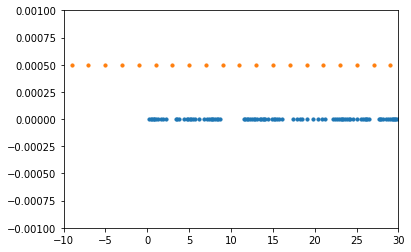

In [7]:
plt.scatter(wordseqs['naked'].data_times, np.zeros_like(wordseqs['naked'].data_times), s=10)
plt.scatter(wordseqs['naked'].tr_times, 5e-4*np.ones_like(wordseqs['naked'].tr_times), s=10)
plt.xlim(-10, 30)
plt.ylim(-1e-3, 1e-3)

In [8]:
# Downsample stimuli
interptype = "lanczos" # filter type
window = 3 # number of lobes in Lanczos filter

downsampled_semanticseqs = dict() # dictionary to hold downsampled stimuli
for story in allstories:
    downsampled_semanticseqs[story] = semanticseqs[story].chunksums(interptype, window=window)

Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.


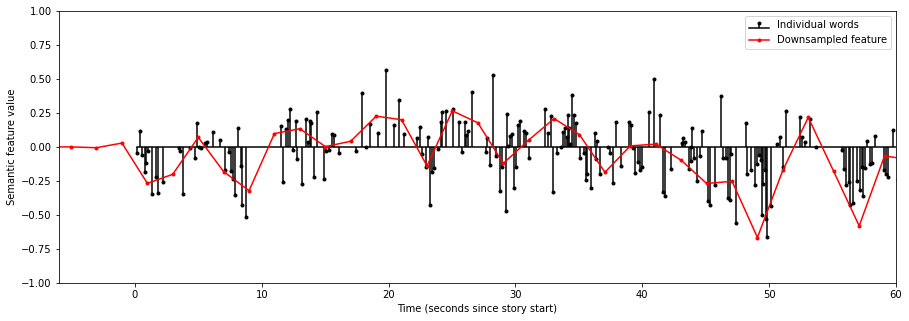

In [9]:

# Plot the result
s_words = wordseqs["naked"]
s_sem = semanticseqs["naked"]
s_semdown = downsampled_semanticseqs["naked"]

f = plt.figure(figsize=(15,5))
f.clf()
schan = 2
ax = f.add_subplot(1,1,1)
wordstems = ax.stem(s_sem.data_times, 
                    s_sem.data[:,schan] / np.abs(s_sem.data[:,schan]).max(), 
                    linefmt="k-", markerfmt="k.", basefmt="k-")
interps = ax.plot(s_sem.tr_times, 
                  s_semdown[:,schan] / np.abs(s_semdown[:,schan]).max(), 'r.-')
ax.set_xlim(-6, 60)
ax.set_ylim(-1, 1)
ax.set_xlabel("Time (seconds since story start)")
ax.set_ylabel("Semantic feature value")
ax.legend((wordstems, interps[0]), ("Individual words", "Downsampled feature"));

In [10]:

# Combine stimuli
from npp import zscore
trim = 5
Rstim = np.vstack([zscore(downsampled_semanticseqs[story][5+trim:-trim]) for story in Rstories])
Pstim = np.vstack([zscore(downsampled_semanticseqs[story][5+trim:-trim]) for story in Pstories])

In [11]:

storylens = [len(downsampled_semanticseqs[story][5+trim:-trim]) for story in Rstories]
print(storylens)

print(np.cumsum(storylens))

[343, 367, 354, 400, 430, 358, 422, 404, 355, 304]
[ 343  710 1064 1464 1894 2252 2674 3078 3433 3737]


In [12]:

# Delay stimuli
from util import make_delayed
ndelays = 4
delays = range(1, ndelays+1)

print ("FIR model delays: ", delays)

delRstim = make_delayed(Rstim, delays)
delPstim = make_delayed(Pstim, delays)

FIR model delays:  range(1, 5)


In [13]:

# Load responses
import tables
resptf = tables.open_file("data/fmri-responses.hf5")
zRresp = resptf.root.zRresp.read()
zPresp = resptf.root.zPresp.read()
mask = resptf.root.mask.read()

In [14]:

# Run regression
from ridge import bootstrap_ridge
alphas = np.logspace(1, 3, 10) # Equally log-spaced alphas between 10 and 1000. The third number is the number of alphas to test.
nboots = 1 # Number of cross-validation runs.
chunklen = 40 # 
nchunks = 20

wt, corr, alphas, bscorrs, valinds = bootstrap_ridge(delRstim, zRresp, delPstim, zPresp,
                                                     alphas, nboots, chunklen, nchunks,
                                                     singcutoff=1e-10, single_alpha=True)

In [15]:

# Then let's predict responses by taking the dot product of the weights and stim
pred = np.dot(delPstim, wt)

print ("pred has shape: ", pred.shape)

pred has shape:  (291, 37226)


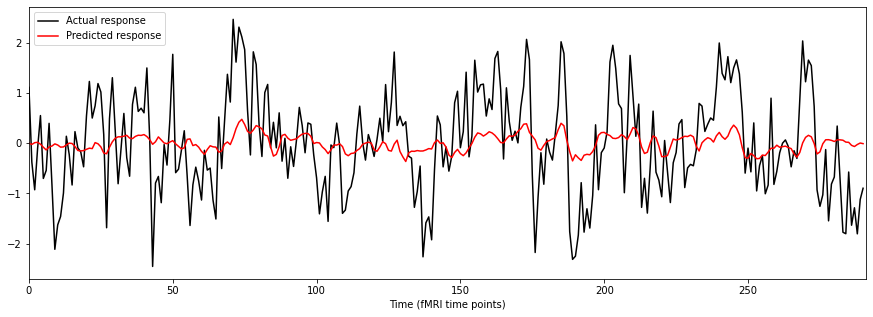

In [16]:

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(1,1,1)

selvox = 20710 # a decent voxel

realresp = ax.plot(zPresp[:,selvox], 'k')[0]
predresp = ax.plot(pred[:,selvox], 'r')[0]

ax.set_xlim(0, 291)
ax.set_xlabel("Time (fMRI time points)")

ax.legend((realresp, predresp), ("Actual response", "Predicted response"));

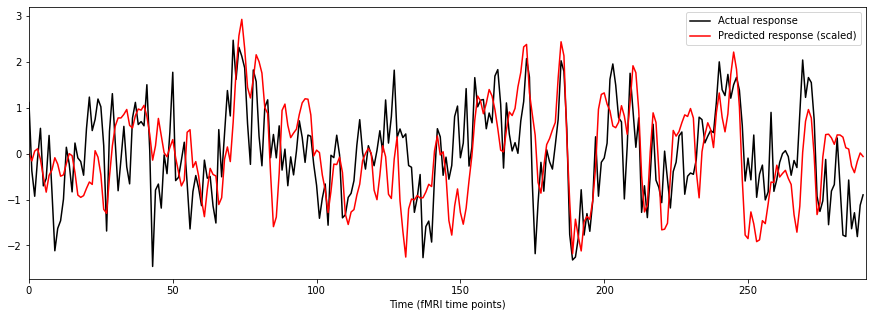

In [17]:

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(1,1,1)

selvox = 20710 # a good voxel

realresp = ax.plot(zPresp[:,selvox], 'k')[0]
predresp = ax.plot(zscore(pred[:,selvox]), 'r')[0]

ax.set_xlim(0, 291)
ax.set_xlabel("Time (fMRI time points)")

ax.legend((realresp, predresp), ("Actual response", "Predicted response (scaled)"));

In [18]:

# Compute correlation between single predicted and actual response
# (np.corrcoef returns a correlation matrix; pull out the element [0,1] to get 
# correlation between the two vectors)
voxcorr = np.corrcoef(zPresp[:,selvox], pred[:,selvox])[0,1]
print ("Correlation between predicted and actual responses for voxel %d: %f" % (selvox, voxcorr))

Correlation between predicted and actual responses for voxel 20710: 0.507891


In [ ]:
wt = torch.from_numpy(wt).float().to(device)

In [15]:

X_train = torch.from_numpy(delRstim).float().to(device)
Y_train = torch.from_numpy(zRresp).float().to(device)
X_test = torch.from_numpy(delPstim).float().to(device)
Y_test = torch.from_numpy(zPresp).float().to(device)

X_train.shape, Y_train.shape

(torch.Size([3737, 3072]), torch.Size([3737, 37226]))

In [16]:
def calc_stats(gt, pred, show_vox_corr_hist=False):
    mse = ((gt-pred)**2).mean()
#     print('MSE: ', mse.item())
#     voxcorrs = np.zeros((gt.shape[1],)) # create zero-filled array to hold correlations
#     for vi in range(zPresp.shape[1]):
#         voxcorrs[vi] = np.corrcoef(gt[:,vi], pred[:,vi])[0,1]
        
    top = ((gt-gt.mean(dim=0))*(pred-pred.mean(dim=0))).sum(dim=0)
    bot = torch.sqrt((gt-gt.mean(dim=0)).pow(2).sum(dim=0)*(pred-pred.mean(dim=0)).pow(2).sum(dim=0))
    voxcorrs = top/bot
    r = voxcorrs.mean()
#     print('Mean Correlation: ', voxcorrs.mean().item())

    if show_vox_corr_hist:
        plt.title('Correlation over voxels')
        plt.hist(voxcorrs, bins=100)
        plt.show()
    return mse.item(), r.item()
    

In [25]:
class AKModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(delRstim.shape[-1], mask.sum())
        self.deep1 = torch.nn.Sequential(torch.nn.Linear(delRstim.shape[-1], 1000),
                                         torch.nn.Sigmoid(),
                                         torch.nn.Linear(1000, 1000),
                                         torch.nn.Sigmoid(),
                                         torch.nn.Linear(1000, 1000),
                                         torch.nn.Sigmoid(),
                                         torch.nn.Linear(1000, mask.sum()))
        self.deep1 = torch.nn.Sequential(torch.nn.Linear(delRstim.shape[-1], 1000),
                                         torch.nn.Linear(1000, mask.sum()))
        
        self.deep2 = torch.nn.Sequential(torch.nn.Linear(delRstim.shape[-1], 1000),
                                         torch.nn.Sigmoid(),
                                         torch.nn.Linear(1000, mask.sum()))
        
    def forward(self, X):
#         Y = self.linear(X) + self.deep1(X)
        Y = self.deep1(X) + self.deep2(X)
        return Y

In [29]:
# model = torch.nn.Sequential(torch.nn.Linear(delRstim.shape[-1], mask.sum())).to(device)
model = AKModel().to(device)

# opt = torch.optim.SGD(model.parameters(), lr=3e1, weight_decay=1e-4)
# opt = torch.optim.SGD(model.parameters(), lr=6e1)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

bs = 4000
all_idxs = range(len(X_train))

for epoch_idx in tqdm(range(1000)[:1000]):
    all_batch_idxs = [all_idxs[i: i+bs] for i in range(0, len(all_idxs), bs)]
    for batch_idxs in (all_batch_idxs):
        X_batch = X_train[batch_idxs]
        Y_batch = Y_train[batch_idxs]
        Y_batch_pred = model(X_batch)
    
        loss = (Y_batch-Y_batch_pred).pow(2).mean()
        
        
        Y_test_pred = model(X_test)
        loss_test = (Y_test-Y_test_pred).pow(2).mean()
        
        opt.zero_grad()
        loss.backward()
#         print('grad')
#         print(list(model.parameters())[0].grad.max())
        opt.step()
        loss = loss.detach()
        
    mse_train, corr_train = calc_stats(Y_batch.detach(), model(X_batch).detach())
    mse_test, corr_test = calc_stats(Y_test.detach(), model(X_test).detach())
    if epoch_idx%5==0:
        print(f'Loss: {loss.item():1.05f}, Corr: {corr_train: 1.05f} ---------------- Loss test: {loss_test.item():1.05f}, Corr: {corr_test: 1.05f}')


RuntimeError: CUDA out of memory. Tried to allocate 532.00 MiB (GPU 0; 10.91 GiB total capacity; 8.64 GiB already allocated; 260.62 MiB free; 9.12 GiB reserved in total by PyTorch)

In [34]:

print('Training Stats')
print(calc_stats(Y_train, model_linear(X_train).detach()))
print()

print('Testing Stats')
print(calc_stats(Y_test, model_linear(X_test).detach()))

Training Stats

Testing Stats


(1.074392557144165, 0.017908405512571335)

In [100]:
print('Training Stats')
mse, corr = calc_stats(Y_train, X_train@wt)
print(f'MSE: {mse}, Correlation: {corr}')

print('Testing Stats')
mse, corr = calc_stats(Y_test, X_test@wt)
print(f'MSE: {mse}, Correlation: {corr}')

Training Stats
MSE: 0.95027095079422, Correlation: 0.2829352021217346
Testing Stats
MSE: 0.9907310605049133, Correlation: 0.08168845623731613


In [75]:
print('Training Stats')
mse, corr = calc_stats(Y_train, X_train@wt)
print(f'MSE: {mse}, Correlation: {corr}')

print('Testing Stats')
mse, corr = calc_stats(Y_test, X_test@wt)
print(f'MSE: {mse}, Correlation: {corr}')

Training Stats
MSE: 0.9529476761817932, Correlation: 0.32585999369621277
Testing Stats
MSE: 0.9895610809326172, Correlation: 0.08863777667284012


In [1]:
z, y, x = [torch.arange(mask.shape[i]) for i in range(len(mask.shape))]
z, y, x = torch.meshgrid(z, y, x)
z = z.flatten()[mask.flatten()]
y = y.flatten()[mask.flatten()]
x = x.flatten()[mask.flatten()]
loc = torch.stack([x, y, z], dim=-1).float()

NameError: name 'mask' is not defined

torch.Size([37226]) torch.Size([37226])


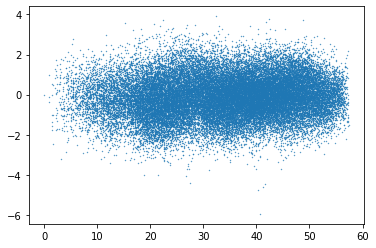

In [75]:
temp = zRresp[1500]
temp.shape

others = torch.from_numpy(temp-temp[0]).float()
othersloc = (loc-loc[0, :]).norm(dim=-1)


print(others.shape, othersloc.shape)
plt.scatter(othersloc, others, marker='.', s=0.5)